# User defined functions
<br>


### It is often useful to define your own function
### when we need to **repeat** simliar code many times over.
<br>
<br>

### If we ever find ourself **copying and pasting**
###  coding it is likely that we code be using a function instead.


<br>
<br>

### There are 2 ways to do this

  1. defined functions
  2. lambda functions (inline)


# Defining a Function

**def** "name of function" (varible):<br>
_______operations to perfom on variable

_______ **return** retsult

In [ ]:
def multiply_by_2(x):
  result = x * 2
  return result

In [ ]:
answer = multiply_by_2(4)
answer

8

# Return multiple outputs

In [ ]:
def times2div8(x):
  result1 = x * 2
  result2 = result1 / 8
  return result1, result2

In [ ]:
answer1, answer2 = times2div8(80)

In [ ]:
print(answer1)
answer2

160


20.0

# Multiple inputs

In [ ]:
def this_times_that(a, b):
  c = a * b
  return c

In [ ]:
this_times_that(60, 78978979)

4738738740

In [ ]:
c = this_times_that(60, 789)
c

47340

# Setting Default for input

In [ ]:
def this_divby_that(a = 2, b = 1):
  c = a / b
  return c

In [ ]:
this_divby_that()

2.0

In [ ]:
this_divby_that(1,2)

0.5

In [ ]:
this_divby_that(a=2,b=1)

2.0

In [ ]:
this_divby_that(b=2, a=1)

0.5

# Doc String

In [ ]:
def join_string(string1, string2):
  """ joins to strings together with a space
  in the middle. Note doc string need to be
  enclosed in 3 quatation marks"""

  joined_string = string1 + " " + string2


  return joined_string

In [ ]:
join_string.__doc__

' joins to strings together with a space \n  in the middle. Note doc string need to be \n  enclosed in 3 quatation marks'

In [ ]:
join_string?

In [ ]:
join_string??

# Functions in a loop

In [ ]:
def add_42(nmbr):
  return nmbr + 42

In [ ]:
list_of_numbers = [1, 2, 3, 4, 5, 6, 7, 100, 1000000000]

In [ ]:
list_of_numbers42 = []

for n in list_of_numbers:

  list_of_numbers42.append(add_42(n))


list_of_numbers42

[43, 44, 45, 46, 47, 48, 49, 142, 1000000042]

# Applying functions with Pandas

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/brandynewanek/data/main/dino.csv')

In [ ]:
df.head()

,height,teeth size,tail length,dino
0,3.244112,18.865971,13.713091,2
1,15.391455,2.115573,20.942076,3
2,14.625879,4.168479,22.010666,3
3,5.574288,21.108127,14.003040,2
4,15.675385,6.361126,7.721574,1


In [ ]:
df.shape

(1000, 4)

## Create a tall medium and short category

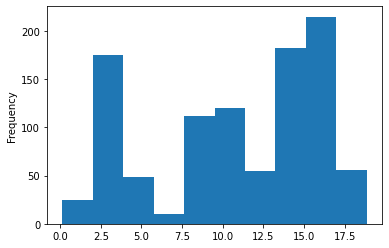

In [ ]:
df['height'].plot(kind='hist')

In [ ]:
def height_buckets(x):
  if x < 7.5:
    value = 'low'
  elif x > 12.5:
    value='high'
  else:
    value = 'medium'

In [ ]:
df['height_cat'] = df['height'].apply(height_buckets)

In [ ]:
df['height_cat'].value_counts()

Series([], Name: height_cat, dtype: int64)

In [ ]:
# don't forget to return the category
def height_buckets(x):
  if x < 7.5:
    value = 'short'
  elif x > 12.5:
    value='tall'
  else:
    value = 'medium'
  return value

In [ ]:
df['height_cat'] = df['height'].apply(height_buckets)

In [ ]:
df['height_cat'].value_counts()

tall      484
medium    259
short     257
Name: height_cat, dtype: int64

In [ ]:
import seaborn as sns

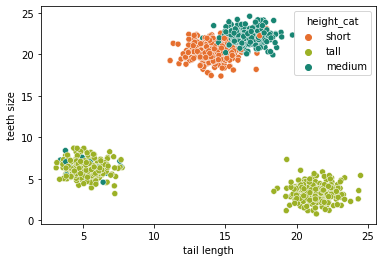

In [ ]:
sns.scatterplot(data=df, x='tail length', y='teeth size', hue='height_cat', palette=['#E56F2F', '#9CB126', '#188573'])

# label the medium anamolies  

In [ ]:
def label_anomalies(x):
  # print(x)
  if x[0] == 'medium':
    if x[1] < 10:
      value = 'anomaly'
    else:
      value = 'normal'
  else:
    value = 'normal'
  return value

In [ ]:
df['anomaly'] = df[['height_cat', 'teeth size']].apply(label_anomalies, axis=1)
df['anomaly'].value_counts()

normal     983
anomaly     17
Name: anomaly, dtype: int64

## joint height category to anomaly

In [ ]:
def join_string2(s):
  """ slight change to the above """
  joined_string = s[0] + " " + s[1]

  return joined_string

In [ ]:
df['anomaly'] = df[['height_cat', 'anomaly']].apply(join_string2, axis=1)
df['anomaly'].value_counts()

tall normal       484
short normal      257
medium normal     242
medium anomaly     17
Name: anomaly, dtype: int64

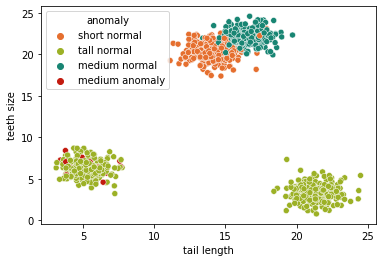

In [ ]:
sns.scatterplot(data=df, x='tail length', y='teeth size', hue='anomaly', palette=['#E56F2F', '#9CB126', '#188573', '#C31B0F'])